# Structure from Motion

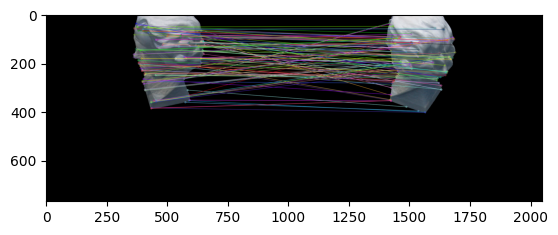

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Initiate ORB detector
orb = cv2.ORB_create()

images = [os.path.join('beethoven/images/', path) for path in sorted(os.listdir('beethoven/images/'))]
silhouettes = [os.path.join('beethoven/silhouettes/', path) for path in sorted(os.listdir('beethoven/silhouettes/'))]

def get_masked_img(index):
    img = cv2.imread(images[index])
    silhouette = cv2.imread(silhouettes[index], cv2.IMREAD_GRAYSCALE)
    
    inv_silhouette = cv2.bitwise_not(silhouette)
    
    masked_img = cv2.bitwise_and(img, img, mask=inv_silhouette)
    
    return masked_img

def extract_features(image, orb):
    # find the keypoints with ORB
    kp = orb.detect(image,None)
    # compute the descriptors with ORB
    kp, des = orb.compute(image, kp)
    return kp, des

def match_features(des1, des2):
    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des1, des2)
    # Sort them in ascending order of distance
    matches = sorted(matches, key=lambda x: x.distance)
    return matches

def get_matched_keypoints(kp1, kp2, matches):
    pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])
    return pts1, pts2

img1 = get_masked_img(2)
img2 = get_masked_img(3)
kp1, des1 = extract_features(img1, orb)
kp2, des2 = extract_features(img2, orb)
matches = match_features(des1, des2)
pts1, pts2 = get_matched_keypoints(kp1, kp2, matches)


# kp, des = extract_features(img, orb)
# # draw only keypoints location,not size and orientation
# img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
# plt.imshow(img2), plt.show()
# # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))